In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner 
# import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.io.shapereader as shpreader

file = '../dataset/haibiaowendu.nc'
dataset = nc.Dataset(file)
# print(dataset.variables.keys())

longitude, latitude = dataset.variables['longitude'],dataset.variables['latitude']
time = dataset.variables['time']
sst =dataset.variables['sst']

In [3]:
sst[4:5,44:136,:].data

array([[[ 5.2860236,  5.2732563,  5.3535175, ...,  5.2903876,
          5.3780828,  5.3791385],
        [ 6.4253283,  6.3984222,  6.465411 , ...,  6.420079 ,
          6.511918 ,  6.518081 ],
        [ 7.506003 ,  7.463666 ,  7.516609 , ...,  7.539931 ,
          7.620336 ,  7.613704 ],
        ...,
        [11.90712  , 12.047306 , 12.198758 , ..., 11.460472 ,
         11.646615 , 11.7958145],
        [10.962218 , 11.111277 , 11.299685 , ..., 10.592537 ,
         10.743341 , 10.864587 ],
        [10.173447 , 10.307209 , 10.51085  , ...,  9.881483 ,
         10.015263 , 10.105494 ]]], dtype=float32)

In [220]:
ls_er = [1983, 1987, 1988, 1992, 1995, 1998, 2003, 2005, 2010, 2015, 2016, 2019, 2020]

ls_lani = [1984, 1985, 1989, 1996, 1999, 2000, 2001,2006, 2008, 2009, 2011, 2012, 2018, 2021, 2022, 2023]

ls_netu = [1979, 1980, 1981, 1982, 1986, 1990, 1991, 1993, 1994, 1997, 2002, 2004, 2007, 2013, 2014, 2017]

def month(year):
    month_jan = (year - 1870)*12
    month_start = month_jan-2
    month_end = month_jan+3
    return month_start, month_end



In [221]:
sum_month_er =  np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C')

for year in ls_er:
    start, end = month(year)
    for i in range(start, end + 1):
        temp_pre = sst[i:i+1, 44:136,:].data[0]
        sum_month_er += temp_pre
        
sum_month_er = sum_month_er / (len(ls_er)*6)

min_num = sum_month_er[0][0]
for i in range(92):
    for j in range(360):
        if sum_month_er[i][j] != sum_month_er.min():        
            if min_num > sum_month_er[i][j]:
                min_num = sum_month_er[i][j]

print(sum_month_er.max(),min_num)

30.298030168582233 2.180185309587381


30.298030168582233 -1.0000000150474662e+30


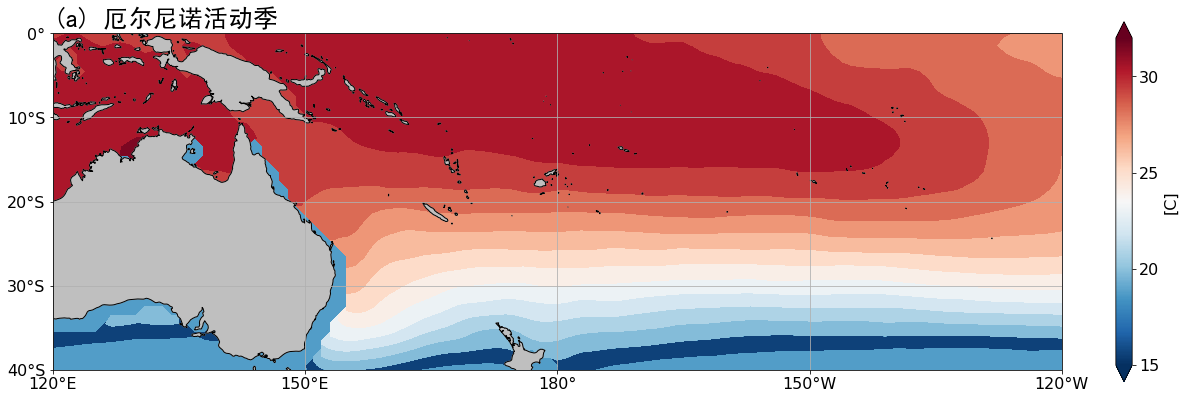

In [222]:
from matplotlib import colors,cm
import matplotlib as mpl
import cmaps
from matplotlib.colors import ListedColormap 

from matplotlib import rcParams
from matplotlib import patches
import matplotlib

matplotlib.font_manager.fontManager.addfont('./font/SimHei.ttf') 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号

# 设置字体
config = {
    "font.family": 'Times New Roman',
    "font.size": 16,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)

MAX = 32
MIN = 15
INTER = 1
# 设置经纬度
lon = longitude[:].data
lat = latitude[45:137].data 
# 调整经纬度 向东偏移180
lon_pacific = lon[:] + 180.5
a, b = np.hsplit(sum_month_er[:,:], [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
print(diff_pacific_contre.max(), diff_pacific_contre.min())


fig = plt.figure(figsize=(15,5))


proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (120,240, -40, 0)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(a) 厄尔尼诺活动季',loc='left',fontsize =25, fontproperties='SimHei',fontweight='bold')

cont = fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre, 
                 levels=np.arange(MIN, MAX, INTER),
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)

norm = colors.Normalize(vmin=MIN, vmax=MAX)    #确定colormap的最大最小值

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=plt.cm.RdBu_r),
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(MIN, MAX, 5).tolist(), 
                 label='[C]',
                 extend='both',
                fraction=0.0155) 

plt.savefig("sst_shift20240420_er.png",dpi=300,bbox_inches='tight')
plt.show()

In [200]:
# 拉尼娜
sum_month_lani =  np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C')

for year in ls_lani:
    start, end = month(year)
    for i in range(start, end + 1):
        temp_pre = sst[i:i+1, 44:136,:].data[0]
        sum_month_lani += temp_pre
        
sum_month_lani = sum_month_lani / (len(ls_lani)*6)

min_num = sum_month_lani[0][0]
for i in range(92):
    for j in range(360):
        if sum_month_lani[i][j] != sum_month_lani.min():        
            if min_num > sum_month_lani[i][j]:
                min_num = sum_month_lani[i][j]

print(sum_month_lani.max(),min_num)

30.307477335135143 2.3384207425018153


30.307477335135143 -1.0000000150474662e+30


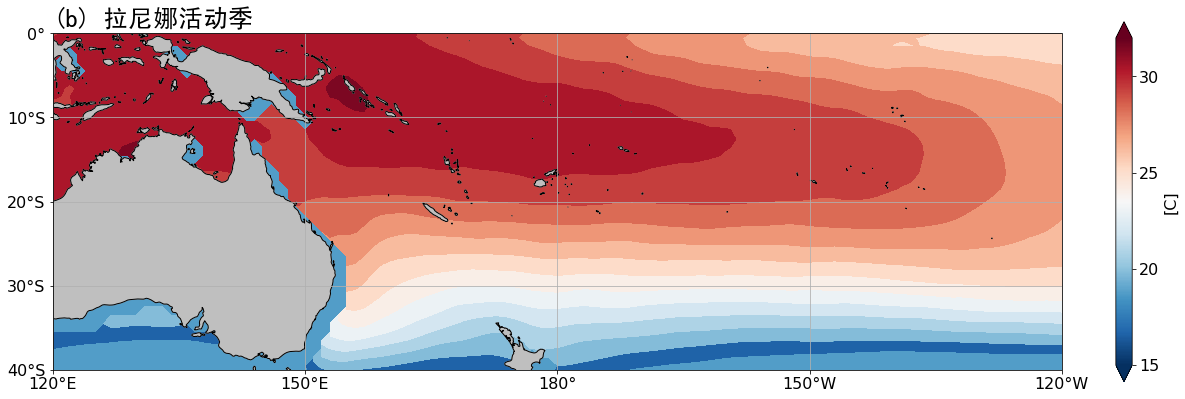

In [202]:
from matplotlib import colors,cm
import matplotlib as mpl
import cmaps
from matplotlib.colors import ListedColormap 

from matplotlib import rcParams
from matplotlib import patches
import matplotlib

matplotlib.font_manager.fontManager.addfont('./font/SimHei.ttf') 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号

# 设置字体
config = {
    "font.family": 'Times New Roman',
    "font.size": 16,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)

MAX = 32
MIN = 15
INTER = 1
# 设置经纬度
lon = longitude[:].data
lat = latitude[45:137].data 
# 调整经纬度 向东偏移180
lon_pacific = lon[:] + 180.5
a, b = np.hsplit(sum_month_lani[:,:], [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
print(diff_pacific_contre.max(), diff_pacific_contre.min())


fig = plt.figure(figsize=(15,5))


proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (120,240, -40, 0)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(b) 拉尼娜活动季',loc='left',fontsize =25, fontproperties='SimHei',fontweight='bold')

cont = fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre, 
                 levels=np.arange(MIN, MAX, INTER),
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)


norm = colors.Normalize(vmin=MIN, vmax=MAX)    #确定colormap的最大最小值

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=plt.cm.RdBu_r),
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(MIN, MAX, 5).tolist(), 
                 label='[C]',
                 extend='both',
                fraction=0.0155) 

plt.savefig("sst_shift20240420_lani.png",dpi=300,bbox_inches='tight')
plt.show()

In [203]:
# 拉尼娜
sum_month_netu =  np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C')

for year in ls_netu:
    start, end = month(year)
    for i in range(start, end + 1):
        temp_pre = sst[i:i+1, 44:136,:].data[0]
        sum_month_netu += temp_pre
        
sum_month_netu = sum_month_netu / (len(ls_netu)*6)

min_num = sum_month_netu[0][0]
for i in range(92):
    for j in range(360):
        if sum_month_lani[i][j] != sum_month_netu.min():        
            if min_num > sum_month_netu[i][j]:
                min_num = sum_month_netu[i][j]

print(sum_month_netu.max(),min_num)

30.141809105873108 2.2911962664996586


30.141809105873108 -1.0000000150474662e+30


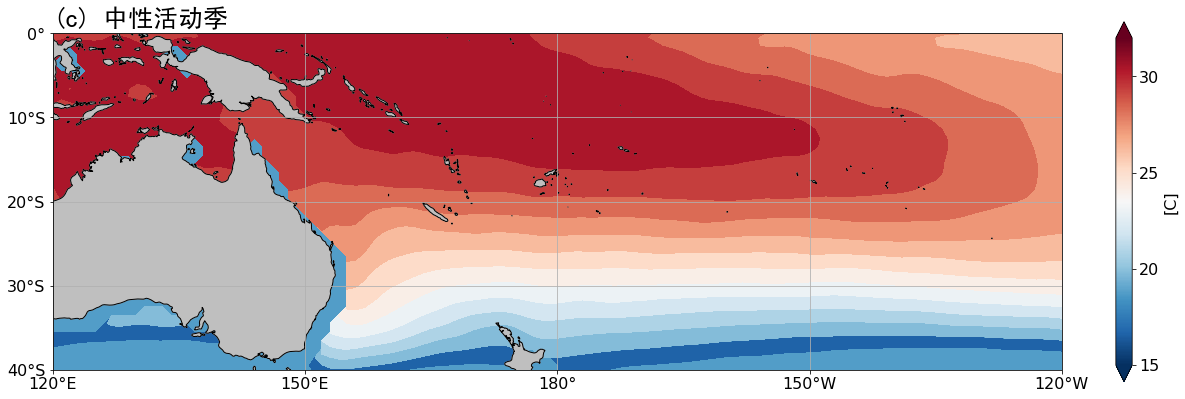

In [205]:
from matplotlib import colors,cm
import matplotlib as mpl
import cmaps
from matplotlib.colors import ListedColormap 

from matplotlib import rcParams
from matplotlib import patches
import matplotlib

matplotlib.font_manager.fontManager.addfont('./font/SimHei.ttf') 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号

# 设置字体
config = {
    "font.family": 'Times New Roman',
    "font.size": 16,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)

MAX = 32
MIN = 15
INTER = 1
# 设置经纬度
lon = longitude[:].data
lat = latitude[45:137].data 
# 调整经纬度 向东偏移180
lon_pacific = lon[:] + 180.5
a, b = np.hsplit(sum_month_netu[:,:], [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
print(diff_pacific_contre.max(), diff_pacific_contre.min())


fig = plt.figure(figsize=(15,5))


proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (120,240, -40, 0)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(c) 中性活动季',loc='left',fontsize =25, fontproperties='SimHei',fontweight='bold')

cont = fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre, 
                 levels=np.arange(MIN, MAX, INTER),
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)


norm = colors.Normalize(vmin=MIN, vmax=MAX)    #确定colormap的最大最小值

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=plt.cm.RdBu_r),
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(MIN, MAX, 5).tolist(), 
                 label='[C]',
                 extend='both',
                fraction=0.0155) 

plt.savefig("sst_shift20240420_netu.png",dpi=300,bbox_inches='tight')
plt.show()

In [223]:
diff_erlani = sum_month_er - sum_month_lani 

In [224]:
print(diff_erlani.max(),diff_erlani.min())

2.67629854190044 -1.1484329570562437


2.67629854190044 -1.1484329570562437


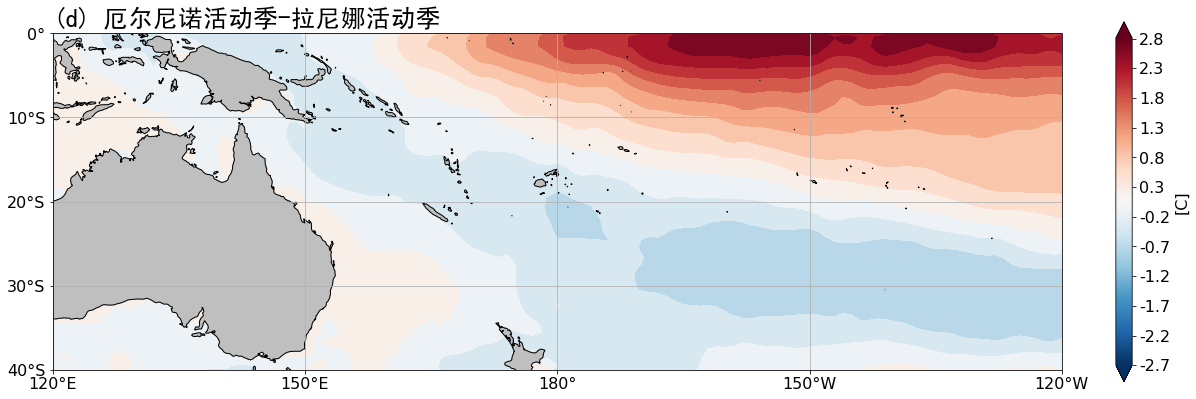

In [242]:
from matplotlib import colors,cm
import matplotlib as mpl
import cmaps
from matplotlib.colors import ListedColormap 

from matplotlib import rcParams
from matplotlib import patches
import matplotlib

matplotlib.font_manager.fontManager.addfont('./font/SimHei.ttf') 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号

# 设置字体
config = {
    "font.family": 'Times New Roman',
    "font.size": 16,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)

MAX = 3.1
MIN = -3
INTER = 0.3
# 设置经纬度
lon = longitude[:].data
lat = latitude[45:137].data 
# 调整经纬度 向东偏移180
lon_pacific = lon[:] + 180.5
a, b = np.hsplit(diff_erlani[:,:], [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
print(diff_pacific_contre.max(), diff_pacific_contre.min())


fig = plt.figure(figsize=(15,5))


proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (120,240, -40, 0)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks([ -150, -120, 120, 150, 180], crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-40,1,10), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(d) 厄尔尼诺活动季-拉尼娜活动季',loc='left',fontsize =25, fontproperties='SimHei',fontweight='bold')

cont = fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre, 
                 levels=np.arange(MIN, MAX, INTER),
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)


norm = colors.Normalize(vmin=MIN, vmax=MAX)    #确定colormap的最大最小值

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=plt.cm.RdBu_r),
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(MIN, MAX, 0.5).tolist(), 
                 label='[C]',
                 extend='both',
                fraction=0.0155) 

plt.savefig("sst_shift20240420_d.png",dpi=300,bbox_inches='tight')
plt.show()